# 🌦️ Weather Prediction Project
---
## Project Overview
In this project, we aim to predict if **temperature/weather conditions** are suitable for BBQ based on historical weather data.

**Steps to follow:**
1. Load and clean the dataset.
2. Perform exploratory data analysis (EDA).
3. Feature engineering.
4. Build baseline and advanced ML models.
5. Evaluate the models.
6. Visualize and conclude.


Kaggle Dataset - [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction/data)

## 1️⃣ Load Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import shap

In [ ]:
df = pd.read_csv('weather_prediction_dataset.csv')
df_bbq = pd.read_csv('weather_prediction_bbq_labels.csv')

In [ ]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [ ]:
df_bbq.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 2️⃣ Data Cleaning & Preprocessing
- Handle missing values
- Remove duplicates
- Convert datatypes (like datetime)
- Feature scaling/encoding if needed

In [ ]:
# We can see there's no missing or null data in the dataset
df.isna().sum()

,0
DATE,0
MONTH,0
BASEL_cloud_cover,0
BASEL_humidity,0
BASEL_pressure,0
...,...
TOURS_global_radiation,0
TOURS_precipitation,0
TOURS_temp_mean,0
TOURS_temp_min,0


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y%m%d")

In [ ]:
required_columns = ['DATE', 'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_wind_gust', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max']

missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print("Missing columns:", missing_columns)
else:
    df_OSLO = df[required_columns]

In [ ]:
df_OSLO['BBQ'] = df_bbq['OSLO_BBQ_weather']

## 3️⃣ Exploratory Data Analysis (EDA)
- Summary statistics
- Correlation heatmap
- Distribution plots
- Trends over time

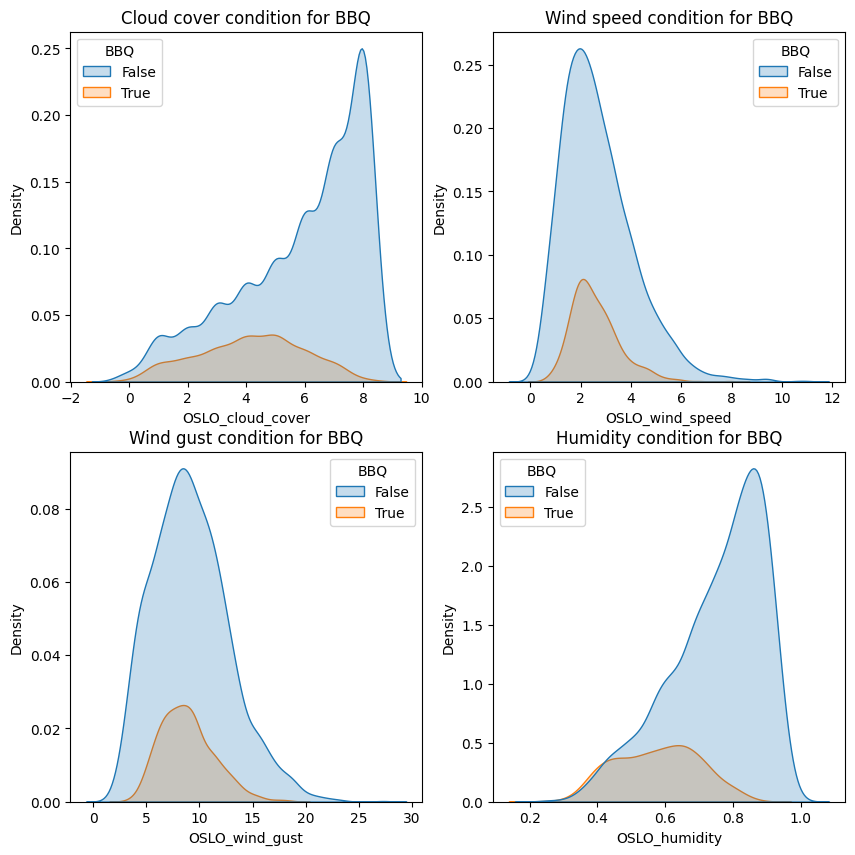

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_OSLO, x='OSLO_cloud_cover', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Cloud cover condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_wind_speed', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Wind speed condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_wind_gust', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Wind gust condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_humidity', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Humidity condition for BBQ')

plt.show()

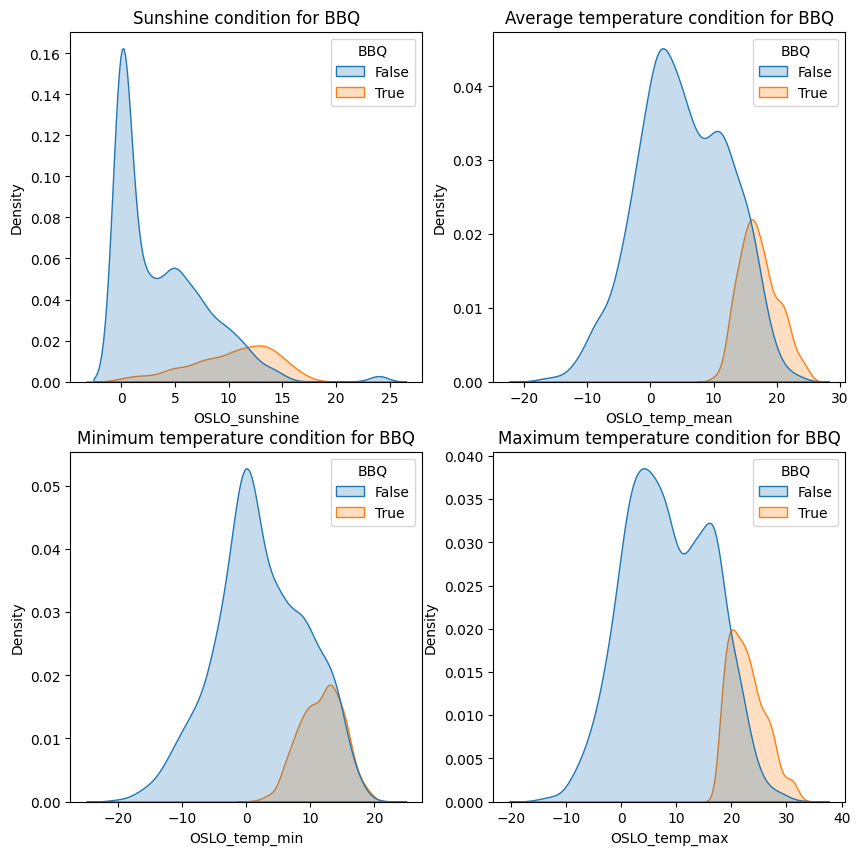

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_OSLO, x='OSLO_sunshine', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Sunshine condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_temp_mean', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Average temperature condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_temp_min', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Minimum temperature condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_temp_max', hue = 'BBQ', fill = True, ax = axs[1,1])
axs[1,1].set_title('Maximum temperature condition for BBQ')

plt.show()

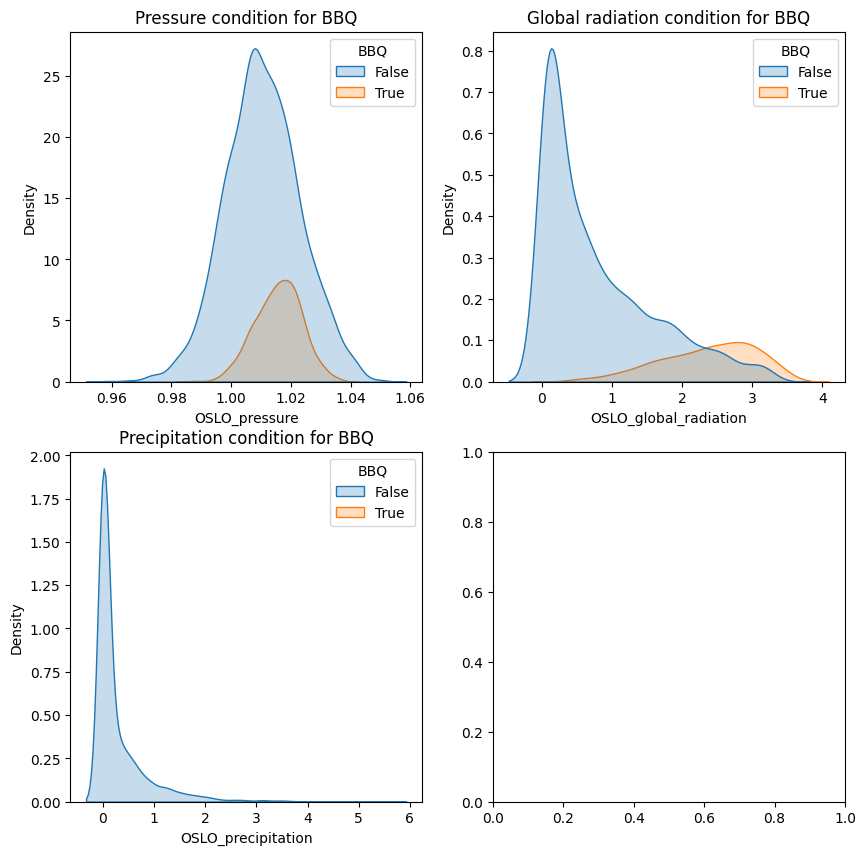

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data = df_OSLO, x='OSLO_pressure', hue = 'BBQ', fill = True, ax = axs[0,0])
axs[0,0].set_title('Pressure condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_global_radiation', hue = 'BBQ', fill = True, ax = axs[0,1])
axs[0,1].set_title('Global radiation condition for BBQ')
sns.kdeplot(data = df_OSLO, x='OSLO_precipitation', hue = 'BBQ', fill = True, ax = axs[1,0])
axs[1,0].set_title('Precipitation condition for BBQ')

plt.show()

## 4️⃣ Feature Engineering
- Extract useful features (month, season, etc.)
- Lag features (previous day’s temperature)
- Rolling averages

In [ ]:
# Add Month and Day series
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day

# Season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Convert Season to categorical (one-hot encoding)
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

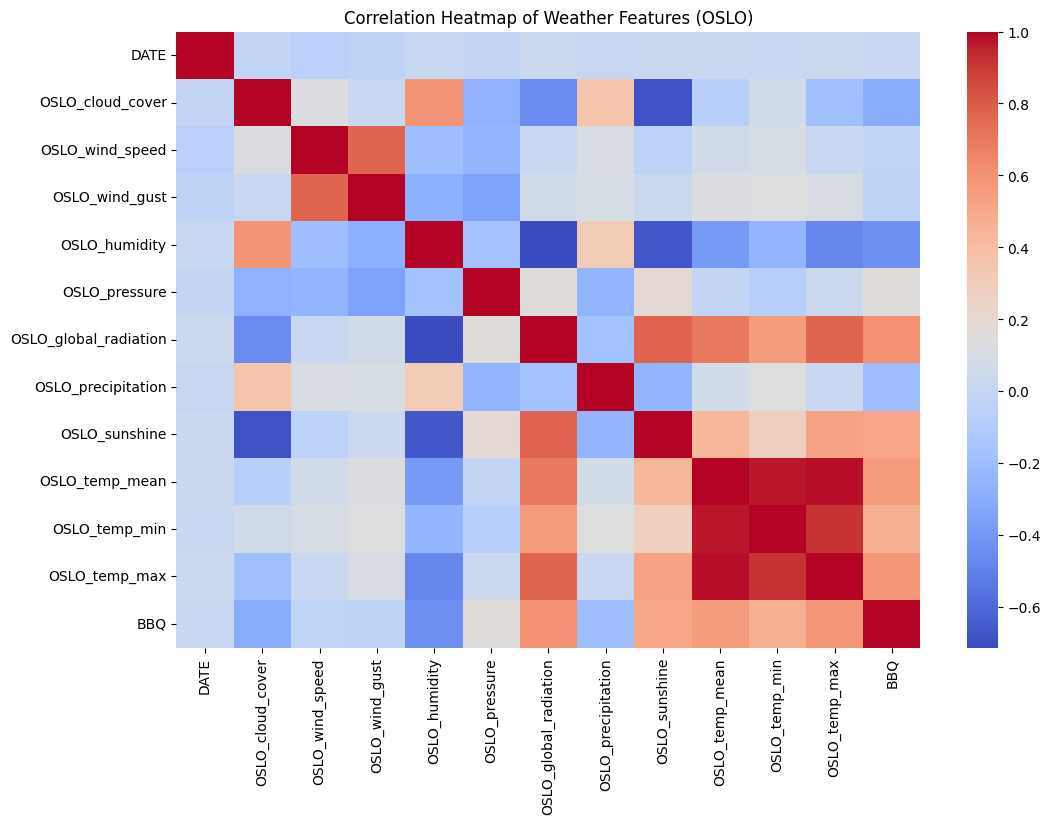

In [ ]:
# Correlation Heatmap for OSLO specific
plt.figure(figsize=(12,8))
sns.heatmap(df_OSLO.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Weather Features (OSLO)")
plt.show()

In [ ]:
X = df_OSLO.drop(['DATE', 'BBQ'], axis = 1)
y = df_OSLO['BBQ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 5️⃣ Model Building
### Baseline Model
- Logistic Regression

### Advanced Models
- Random Forest Classifier
- Gradient Boosting
- Neural Network

In [ ]:
results = {}

# First we will train a baseline model (Logistic Regression)
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predicting the model on test dataset
log_test_pred = log_model.predict(X_test)

In [ ]:
# Checking the accuracy of the model on test dataset
results['Logistic Regression'] = accuracy_score(y_test, log_test_pred)

print("Logistic Regression Report:\n", classification_report(y_test, log_test_pred))

Logistic Regression Report:
               precision    recall  f1-score   support

       False       0.98      0.98      0.98       613
        True       0.89      0.87      0.88       118

    accuracy                           0.96       731
   macro avg       0.93      0.93      0.93       731
weighted avg       0.96      0.96      0.96       731



In [ ]:
# Now we will see the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

rf_test_pred = rf_model.predict(X_test)

results['Random Forest'] = accuracy_score(y_test, rf_test_pred)

print("Random Forest Report:\n", classification_report(y_test, rf_test_pred))

Random Forest Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       613
        True       1.00      1.00      1.00       118

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



In [ ]:
# Now we apply XGBoost algorithm to out dataset
xgb_model = xgb.XGBClassifier(n_estimators=150, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_test_pred = xgb_model.predict(X_test)

results['XGBoost'] = accuracy_score(y_test, xgb_test_pred)

print("XGBoost Report:\n", classification_report(y_test, xgb_test_pred))

XGBoost Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       613
        True       1.00      1.00      1.00       118

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



In [ ]:
# Now let's try applying LightGBM to the dataset
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

lgb_test_pred = lgb_model.predict(X_test)

results['LightGBM'] = accuracy_score(y_test, lgb_test_pred)

print("LightGBM Report:\n", classification_report(y_test, lgb_test_pred))

[LightGBM] [Info] Number of positive: 499, number of negative: 2424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 2923, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170715 -> initscore=-1.580568
[LightGBM] [Info] Start training from score -1.580568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# At last, we try Simple Neural Network model on our dataset to check prediction and accuracy
ann_model = Sequential([
    Dense(units = 128, activation = 'relu', kernel_regularizer = 'l2', input_shape=(X_train.shape[1], )),
    Dropout(0.2),
    Dense(units = 64, activation = 'relu', kernel_regularizer = 'l2'),
    Dropout(0.2),
    Dense(units = 32, activation = 'relu', kernel_regularizer = 'l2'),
    Dropout(0.2),
    Dense(units = 1, activation = 'sigmoid')
])

ann_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

ann_model.fit(x=X_train, y=y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), verbose=1)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8104 - loss: 1.6885 - val_accuracy: 0.9070 - val_loss: 0.9737
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8917 - loss: 0.9215 - val_accuracy: 0.9138 - val_loss: 0.6672
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8977 - loss: 0.6791 - val_accuracy: 0.9220 - val_loss: 0.5289
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9149 - loss: 0.5272 - val_accuracy: 0.9124 - val_loss: 0.4516
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9058 - loss: 0.4613 - val_accuracy: 0.9015 - val_loss: 0.4142
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9227 - loss: 0.3917 - val_accuracy: 0.9234 - val_loss: 0.3467
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9179 - loss: 0.3563 - val_accuracy: 0.9138 - val_loss: 0.3242
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9165 - loss: 0.3333 - val_accuracy: 0.9138 - 

<Axes: >

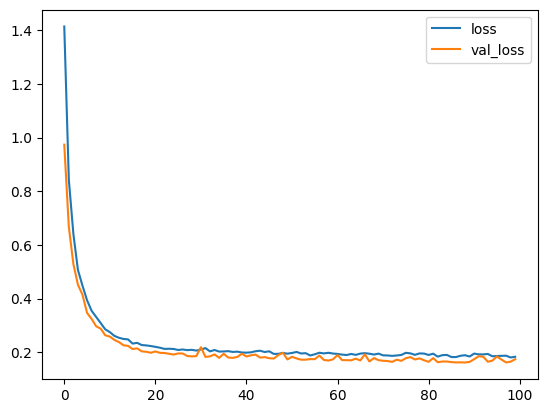

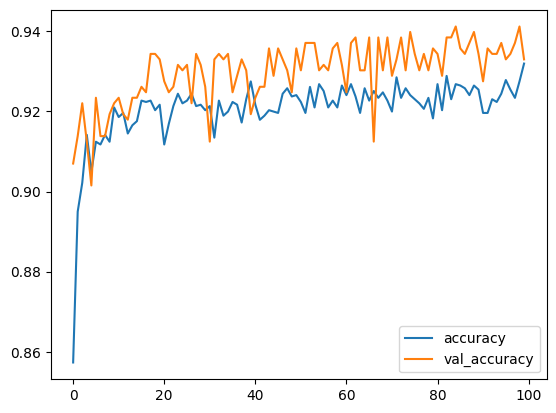

In [ ]:
model_loss_acc = pd.DataFrame(ann_model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [ ]:
ann_predictions = ann_model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
ann_predictions = (ann_predictions > 0.5).astype("int32")

In [ ]:
ann_acc = accuracy_score(y_test, ann_predictions)
print("Accuracy:", ann_acc)

results['ANN'] = ann_acc

Accuracy: 0.93296853625171


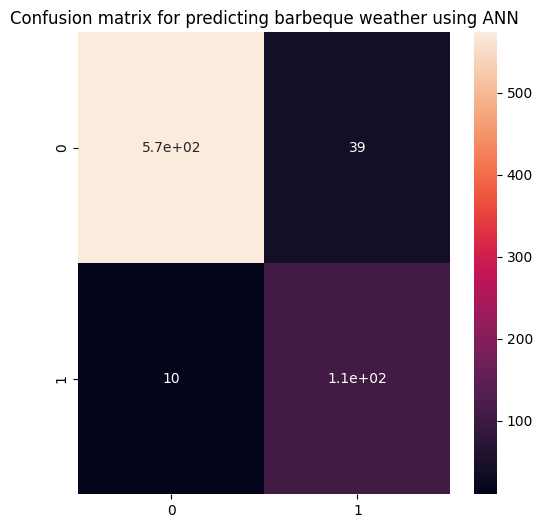

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, ann_predictions), annot = True)
plt.title('Confusion matrix for predicting barbeque weather using ANN');

In [ ]:
# Final Results
print("\n✅ Model Accuracies:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


✅ Model Accuracies:
Logistic Regression: 0.9617
Random Forest: 1.0000
XGBoost: 1.0000
LightGBM: 1.0000
ANN: 0.9330


## 6️⃣ Prediction & Visualization
- Plot predicted vs actual temperature
- Future prediction example

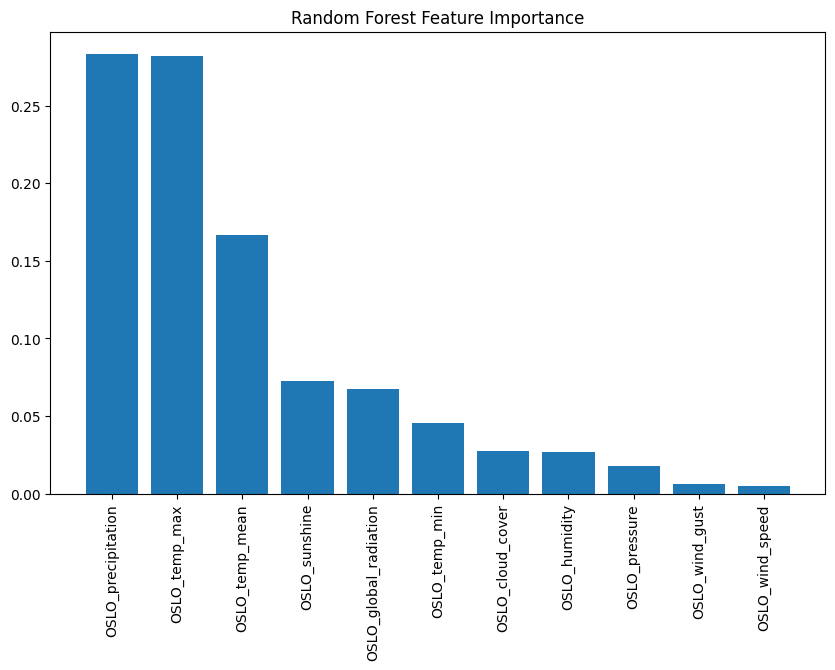

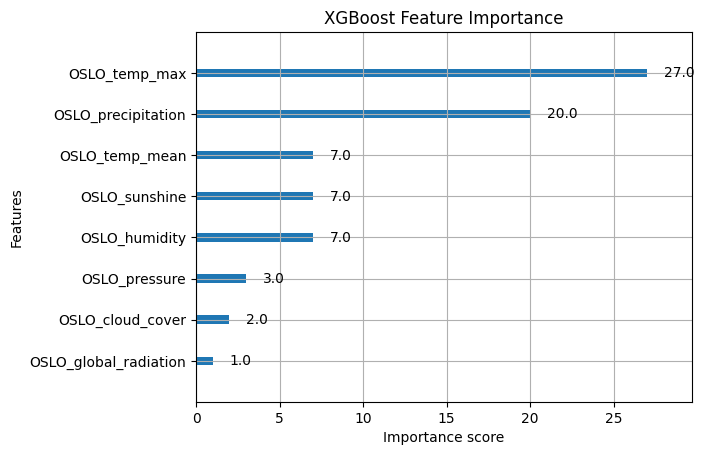

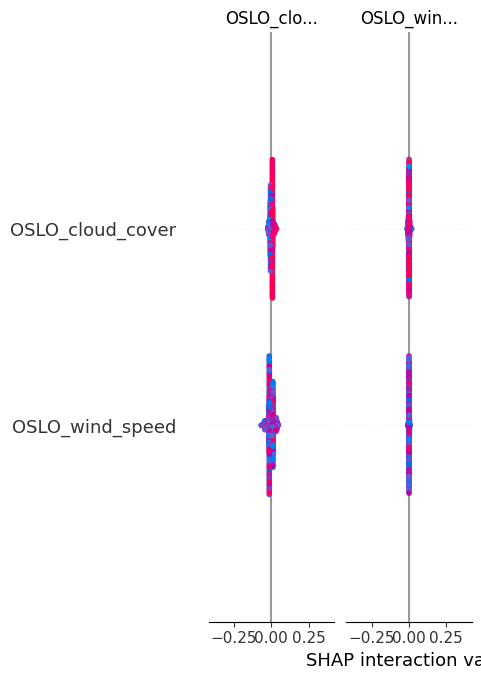

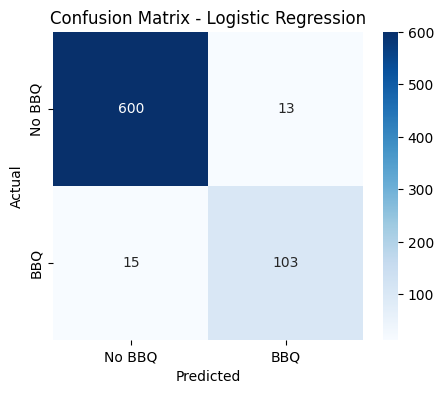

Classification Report - Logistic Regression

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       613
        True       0.89      0.87      0.88       118

    accuracy                           0.96       731
   macro avg       0.93      0.93      0.93       731
weighted avg       0.96      0.96      0.96       731



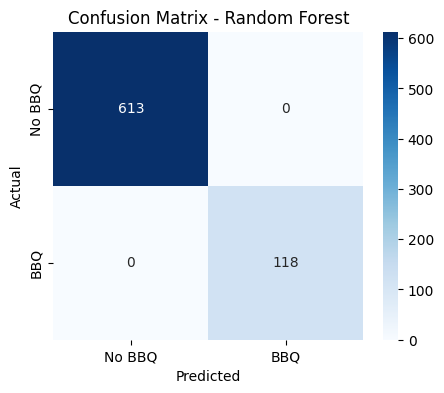

Classification Report - Random Forest

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       613
        True       1.00      1.00      1.00       118

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



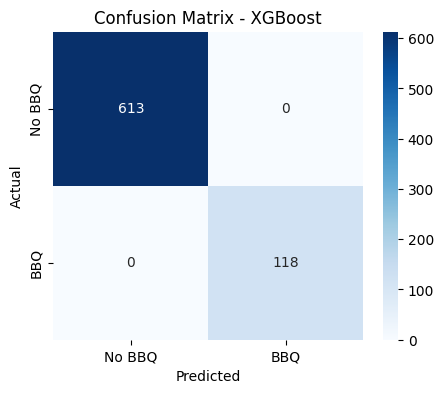

Classification Report - XGBoost

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       613
        True       1.00      1.00      1.00       118

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



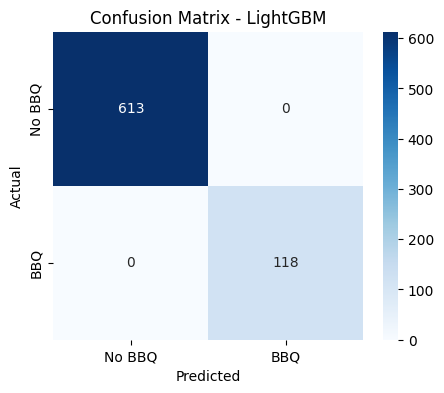

Classification Report - LightGBM

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       613
        True       1.00      1.00      1.00       118

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



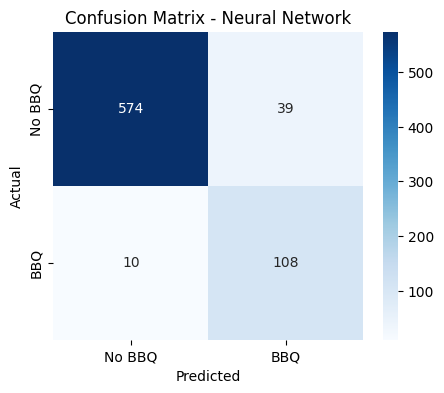

Classification Report - Neural Network

              precision    recall  f1-score   support

       False       0.98      0.94      0.96       613
        True       0.73      0.92      0.82       118

    accuracy                           0.93       731
   macro avg       0.86      0.93      0.89       731
weighted avg       0.94      0.93      0.94       731



In [ ]:
# 1. Feature Importance (RandomForest)
plt.figure(figsize=(10,6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Random Forest Feature Importance")
plt.show()


# 2. Feature Importance (XGBoost)
xgb.plot_importance(xgb_model, max_num_features=10, importance_type="weight")
plt.title("XGBoost Feature Importance")
plt.show()


# 3. SHAP Values (Explainability)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot (which features matter most overall)
shap.summary_plot(shap_values, X_test)


# 4. Confusion Matrix + Classification Report (All Models)
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No BBQ", "BBQ"], yticklabels=["No BBQ", "BBQ"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    print(f"Classification Report - {model_name}\n")
    print(classification_report(y_true, y_pred))

# Logistic Regression
plot_confusion(y_test, log_test_pred, "Logistic Regression")

# Random Forest
plot_confusion(y_test, rf_test_pred, "Random Forest")

# XGBoost
plot_confusion(y_test, xgb_test_pred, "XGBoost")

# LightGBM
plot_confusion(y_test, lgb_test_pred, "LightGBM")

# Neural Net
plot_confusion(y_test, ann_predictions, "Neural Network")